## ✅ Step 1: Import Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

## ✅ Step 2: Load and Prepare the Dataset

#### Load dataset

In [111]:
data = pd.read_excel('breastCancer_data.xlsx')
# See column names
print(data.columns)

#X = data.data
#y = data.target

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [112]:
# Drop 'id' column if present
data = data.drop(columns=['id'])

In [113]:
# Convert diagnosis to binary: M = 1, B = 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [114]:
# Set up features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

## ✅ Step 3: Split into features (X) and target (y)
### Replace 'target_column_name' with your actual column name

In [115]:
X = data.drop('diagnosis', axis=1)  # All columns except 'diagnosis'
y = data['diagnosis']               # The target column is 'diagnosis'

## ✅ Step 4: Standardize features

In [116]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## ✅ Step 5: Train-test split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## ✅ Step 6: Build the Neural Network model

In [118]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

## ✅ Step 7: Compile

In [119]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## ✅ Step 8: Train

In [120]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7848 - loss: 0.5024 - val_accuracy: 0.9348 - val_loss: 0.3583
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9584 - loss: 0.2752 - val_accuracy: 0.9348 - val_loss: 0.2180
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9682 - loss: 0.1736 - val_accuracy: 0.9348 - val_loss: 0.1556
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9756 - loss: 0.1222 - val_accuracy: 0.9565 - val_loss: 0.1263
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0947 - val_accuracy: 0.9783 - val_loss: 0.1106
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9829 - loss: 0.0800 - val_accuracy: 0.9783 - val_loss: 0.1007
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9853 - loss: 0.0695 - val_accuracy: 0.9783 - val_loss: 0.0961
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0622 - val_accuracy: 0.9783 - val_loss:

## ✅ Step 9: Evaluate

In [121]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\n🎯 Test Accuracy: {test_accuracy:.4f}\n")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9649 - loss: 0.1075 

🎯 Test Accuracy: 0.9649



In [122]:
# ✅ Save model

model.save("model.h5")
print("✅ Model saved successfully as 'model.h5'")

✅ Model saved successfully as 'model.h5'


## ✅ Step 10: Predict

In [123]:
y_pred_probs = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/stepWARNING:tensorflow:5 out of the last 17 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3127cf420> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


## 📄 Classification Report

In [124]:
# Define readable target names
target_names = ['Malignant', 'Benign']

print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

📋 Classification Report:

              precision    recall  f1-score   support

   Malignant       0.97      0.97      0.97        71
      Benign       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## Confusion Matrix

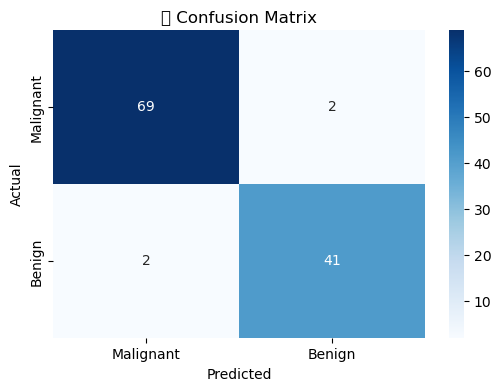

In [125]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('🧩 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Accuracy and Loss Plot

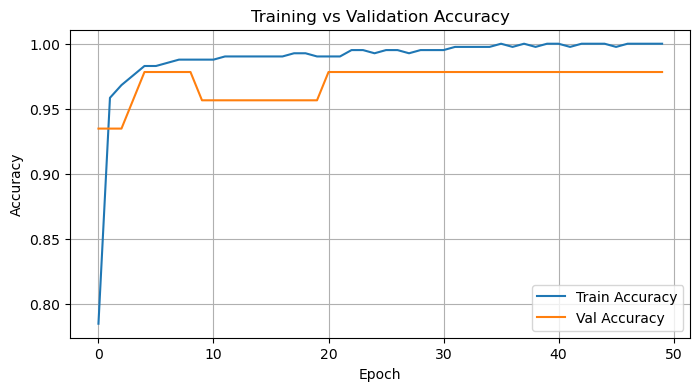

In [126]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Predict on 5 test samples

In [127]:
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_inputs = X_test[sample_indices]
sample_scaled = scaler.transform(sample_inputs)
sample_preds = (model.predict(sample_scaled) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [128]:
# 🔍 Predict on 5 random test samples
print("\n🔍 Sample Predictions:\n")
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_inputs = X_test[sample_indices]
sample_scaled = scaler.transform(sample_inputs)
sample_preds = (model.predict(sample_scaled) > 0.5).astype(int)

# Now print actual vs predicted for each sample
for i, idx in enumerate(sample_indices):
    actual = "Benign" if y_test.iloc[idx] == 1 else "Malignant"
    predicted = "Benign" if sample_preds[i][0] == 1 else "Malignant"
    print(f"Sample {i+1}: Predicted = {predicted}, Actual = {actual}")



🔍 Sample Predictions:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Sample 1: Predicted = Benign, Actual = Malignant
Sample 2: Predicted = Malignant, Actual = Malignant
Sample 3: Predicted = Malignant, Actual = Malignant
Sample 4: Predicted = Benign, Actual = Malignant
Sample 5: Predicted = Benign, Actual = Malignant
